In [ ]:
# 이번 시도에선 기본값으로 테스트를 해볼 것이다.
# optimizer 를 기본값으로 설정하고,
# validation_data나 callbacks 는 설정하지 않을 것이며,
# optimizer 의 학습률도 변경하지 않을 것이다.

# 이후 다음 시도에선 optimizer 을 조정하고, validation_data 와 callbacks 를 추가할 것이다.

# 시작하기에 앞서서 A005930 삼성 데이터를 여기 옮겨줘야 시작이 된다.

In [2]:
import matplotlib.pylab as plt
import tensorflow as tf

   1|0.78|0.72|1.62


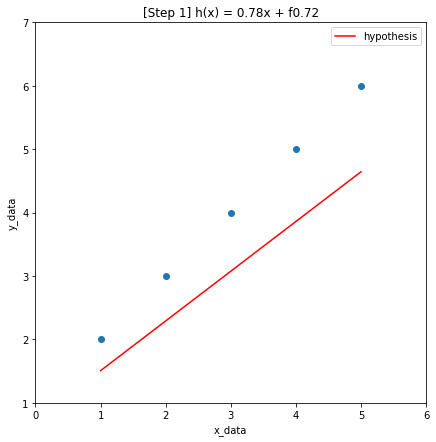

   3|0.90|0.76|0.55


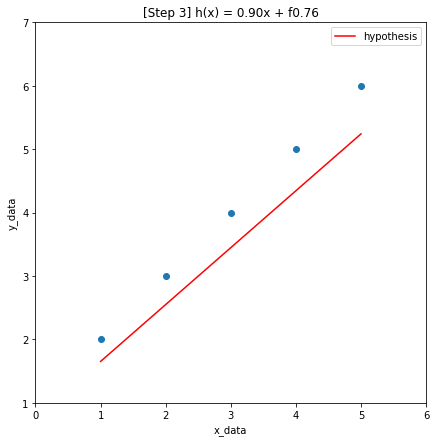

   5|0.96|0.78|0.19


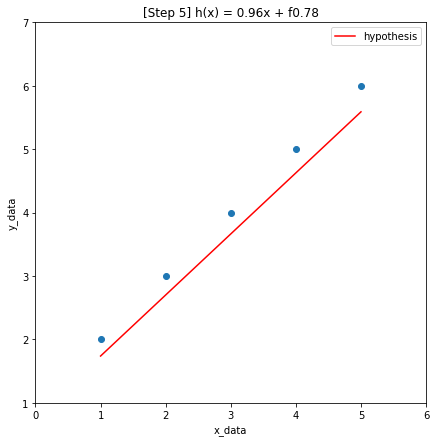

  10|1.03|0.80|0.02


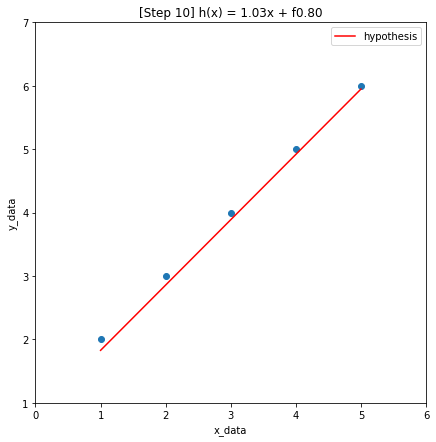

1000|1.00|0.99|0.00


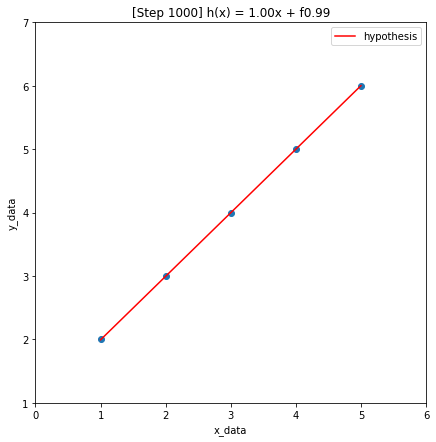

1100|1.00|1.00|0.00


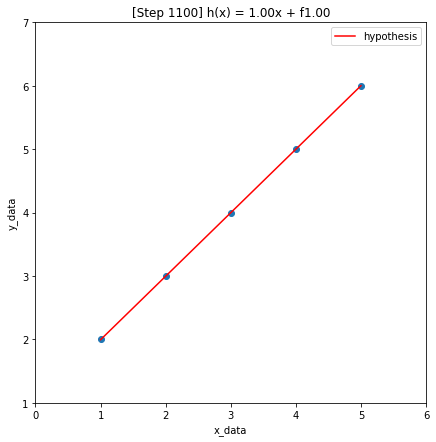

In [3]:
x_data = [1,2,3,4,5]
y_data = [2,3,4,5,6]

w = tf.Variable(0.7)
b = tf.Variable(0.7)
learn_rate = 0.01

for i in range(1,1101):
  with tf.GradientTape() as tape:
    # 내부의 계산 과정을 tape 에 기록해두면 나중에 
    # tape.gradient() 함수를 이용해서 미분값을 구할 수 있다.
    hypothesis = w * x_data + b
    # 가설은 wx + b 로 한다.
    cost = tf.reduce_mean((hypothesis-y_data)**2)
    # 손실 비용은 MSE 로 한다. 
    # 이렇게 적거나 또는
    # tf.losses.mean_squared_error(hypothesis-y_data)
    # 라고 해도 된다.
  dw, db = tape.gradient(cost, [w,b])
  # w에 대한 편미분과 b에 대한 편미분을 손실함수를 w와 b로 각각 미분해서 구한다.
  # 매 시도마다 wx+b 의 편미분값을 tape 가 기록한다.

  w.assign_sub(learn_rate * dw)
  b.assign_sub(learn_rate * db)
  # assign_sub 함수는 a = a-b 와 동일한 연산을 한다.
  # 즉 w에서 learn_rate*dw 를 뺀 값을 새로운 w로 설정한다.
  # assign : 할당한다. sub : subtract, 빼고 나서

  if i in [1,3,5,10,1000,1100]:
    print(f'{i:4d}|{w.numpy():.2f}|{b.numpy():.2f}|{cost:.2f}')
    plt.figure(figsize=(7,7))
    plt.title(f'[Step {i:d}] h(x) = { w.numpy():.2f}x + f{b.numpy():.2f}')
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, w*x_data+b, 'r', label='hypothesis')
    plt.xlabel('x_data')
    plt.ylabel('y_data')
    plt.xlim(0,6)
    plt.ylim(1,7)
    plt.legend(loc='best')
    plt.show()



In [74]:
import pandas as pd

In [75]:
samsung = pd.read_csv('./A005930.csv')

In [76]:
samsung_d_p = samsung[['DAY','CLO_PR']]

In [77]:
new_samsung = samsung[['DAY','CUR_PR','HIGH_PR','LOW_PR','CLO_PR','PR_DIFF','FOR_STOR']]

In [78]:
new_col_sam = new_samsung.rename({'DAY':'date','CUR_PR':'open','HIGH_PR':'high','LOW_PR':'low','CLO_PR':'close','PR_DIFF':'diff','FOR_STOR':'volume'})


In [79]:
new_col_sam['PR_DIFF'] = abs(new_col_sam['PR_DIFF'])

In [88]:
new_col_sam2 = new_col_sam[::-1]
new_col_sam2.reset_index(drop=True, inplace=True)
new_col_sam2

,DAY,CUR_PR,HIGH_PR,LOW_PR,CLO_PR,PR_DIFF,FOR_STOR
0,19800104,8500,8550,8200,8200,2550,0
1,19800105,8000,8350,8000,8350,150,0
2,19800107,8700,8850,8650,8850,500,0
3,19800108,9350,9350,9050,9350,500,0
4,19800109,9500,9800,9250,9800,450,0
...,...,...,...,...,...,...,...
11045,20210315,82800,82900,81800,81800,1000,3263213
11046,20210316,82200,83000,82100,82800,1000,3264455
11047,20210317,82800,82900,82000,82300,500,3265091
11048,20210318,82800,83800,82600,82900,600,3267993


In [89]:
samsung_fin =new_col_sam2.loc[new_col_sam2['DAY']>20180505]

In [90]:
samsung_fin

,DAY,CUR_PR,HIGH_PR,LOW_PR,CLO_PR,PR_DIFF,FOR_STOR
10345,20180508,52600,53200,51900,52600,700,3389501
10346,20180509,52600,52800,50900,50900,1700,3388504
10347,20180510,51700,51700,50600,51600,700,3387180
10348,20180511,52000,52200,51200,51300,300,3387568
10349,20180514,51000,51100,49900,50100,1200,3384973
...,...,...,...,...,...,...,...
11045,20210315,82800,82900,81800,81800,1000,3263213
11046,20210316,82200,83000,82100,82800,1000,3264455
11047,20210317,82800,82900,82000,82300,500,3265091
11048,20210318,82800,83800,82600,82900,600,3267993


In [91]:
samsung_fin

,DAY,CUR_PR,HIGH_PR,LOW_PR,CLO_PR,PR_DIFF,FOR_STOR
10345,20180508,52600,53200,51900,52600,700,3389501
10346,20180509,52600,52800,50900,50900,1700,3388504
10347,20180510,51700,51700,50600,51600,700,3387180
10348,20180511,52000,52200,51200,51300,300,3387568
10349,20180514,51000,51100,49900,50100,1200,3384973
...,...,...,...,...,...,...,...
11045,20210315,82800,82900,81800,81800,1000,3263213
11046,20210316,82200,83000,82100,82800,1000,3264455
11047,20210317,82800,82900,82000,82300,500,3265091
11048,20210318,82800,83800,82600,82900,600,3267993


In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
mms = MinMaxScaler()

In [94]:
samsung_fin.rename(inplace=True, columns = {'DAY':'date','CUR_PR':'open','HIGH_PR':'high','LOW_PR':'low','CLO_PR':'close','PR_DIFF':'diff','FOR_STOR':'volume'})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
samsung_fin

,date,open,high,low,close,diff,volume
10345,20180508,52600,53200,51900,52600,700,3389501
10346,20180509,52600,52800,50900,50900,1700,3388504
10347,20180510,51700,51700,50600,51600,700,3387180
10348,20180511,52000,52200,51200,51300,300,3387568
10349,20180514,51000,51100,49900,50100,1200,3384973
...,...,...,...,...,...,...,...
11045,20210315,82800,82900,81800,81800,1000,3263213
11046,20210316,82200,83000,82100,82800,1000,3264455
11047,20210317,82800,82900,82000,82300,500,3265091
11048,20210318,82800,83800,82600,82900,600,3267993


In [96]:
data = samsung_fin[['open','high','low','volume','close']]
data

,open,high,low,volume,close
10345,52600,53200,51900,3389501,52600
10346,52600,52800,50900,3388504,50900
10347,51700,51700,50600,3387180,51600
10348,52000,52200,51200,3387568,51300
10349,51000,51100,49900,3384973,50100
...,...,...,...,...,...
11045,82800,82900,81800,3263213,81800
11046,82200,83000,82100,3264455,82800
11047,82800,82900,82000,3265091,82300
11048,82800,83800,82600,3267993,82900


In [97]:
mms.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [98]:
new_data = mms.transform(data)

In [99]:
new_data

array([[0.28666036, 0.26351351, 0.28584995, 0.64180268, 0.28291317],
       [0.28666036, 0.25675676, 0.2668566 , 0.63694361, 0.25116713],
       [0.26963103, 0.23817568, 0.26115859, 0.63049083, 0.26423903],
       ...,
       [0.85808893, 0.7652027 , 0.85754986, 0.0354659 , 0.83753501],
       [0.85808893, 0.78040541, 0.86894587, 0.04960937, 0.8487395 ],
       [0.8448439 , 0.75844595, 0.85375119, 0.05414679, 0.83006536]])

In [100]:
new_data_target = new_data[:,4]
new_data_target

array([0.28291317, 0.25116713, 0.26423903, 0.25863679, 0.23622782,
       0.2194211 , 0.23155929, 0.22315593, 0.22502334, 0.23436041,
       0.26797386, 0.2605042 , 0.28478058, 0.27731092, 0.25863679,
       0.22502334, 0.24743231, 0.25863679, 0.25490196, 0.25863679,
       0.24556489, 0.22782446, 0.232493  , 0.22315593, 0.20074697,
       0.19047619, 0.17086835, 0.178338  , 0.178338  , 0.17927171,
       0.18300654, 0.17180205, 0.178338  , 0.19607843, 0.17460317,
       0.17180205, 0.1512605 , 0.16246499, 0.1643324 , 0.15873016,
       0.13912232, 0.15219421, 0.16526611, 0.15966387, 0.1503268 ,
       0.16900093, 0.16059757, 0.15686275, 0.16993464, 0.17647059,
       0.18674136, 0.16900093, 0.16246499, 0.16246499, 0.17647059,
       0.17647059, 0.16900093, 0.1643324 , 0.16993464, 0.1512605 ,
       0.15499533, 0.15592904, 0.17273576, 0.17460317, 0.17647059,
       0.14845938, 0.14192344, 0.14379085, 0.12698413, 0.12418301,
       0.11951447, 0.1372549 , 0.16153128, 0.16339869, 0.16246

In [101]:
from sklearn.model_selection import train_test_split
import numpy as np

In [102]:
new_data.shape

(705, 5)

In [103]:
new_data_target.shape

(705,)

In [104]:
from tensorflow import keras

In [105]:
data_x = []
data_y = []

window_size = 50
for i in range(len(new_data) - window_size):
  _x = new_data[i: i+window_size]
  _y = new_data_target[i+window_size]
  data_x.append(_x)
  data_y.append(_y)

# window_size 만큼의 x 데이터의 결과값이 y[window_size+1] 이 된다.
# 즉 그 전날 60일만큼의 데이터가 그 다음의 주가를 예측한다.

In [106]:
train_size = int(len(data_x)*0.7)
X_train = np.array(data_x[0:train_size])
y_train = np.array(data_y[0:train_size])
X_test = np.array(data_x[train_size:])
y_test = np.array(data_y[train_size:])

In [107]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='||')
print(len(X_train), len(y_train))
# 704개의 데이터
# 앞에 20개가 다음 1개가 됨.
# 그래서 684일치의 데이터가 됨.
# 20180508 + 20일 이후부터 데이터니깐,
# 28일부터.


(458, 50, 5)||(458,)||(197, 50, 5)||(197,)
458 458


In [109]:
model = keras.Sequential()

In [110]:

model.add(keras.layers.LSTM(units=10, activation='relu', return_sequences=True, input_shape = (window_size, 5)))
# 60일 동안의 기록을 넣어서 시계열 데이터 분석. 5는 한 분기 마다 5개의 데이터가 들어있기 때문.
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(units=10, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=30)
pred_y = model.predict(X_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 10)            640       
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 10)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 3s 31ms/step - loss: 0.0453
Epoch 2/100
16/16 [==================

In [137]:
20180528
# train_size = int(len(data_x)*0.7)
# (479, 20, 5)||(479,)||(206, 20, 5)||(206,)
# (458, 50, 5)||(458,)||(197, 50, 5)||(197,)
dates = samsung_fin['date'][window_size:705]
print(dates.shape)
dates.astype(str)
new_dates = dates[train_size:]

(655,)


In [138]:
pred_y_pd = pd.DataFrame(pred_y, index=new_dates, columns=['price'])
y_test_pd = pd.DataFrame(y_test, index=new_dates, columns=['price'])

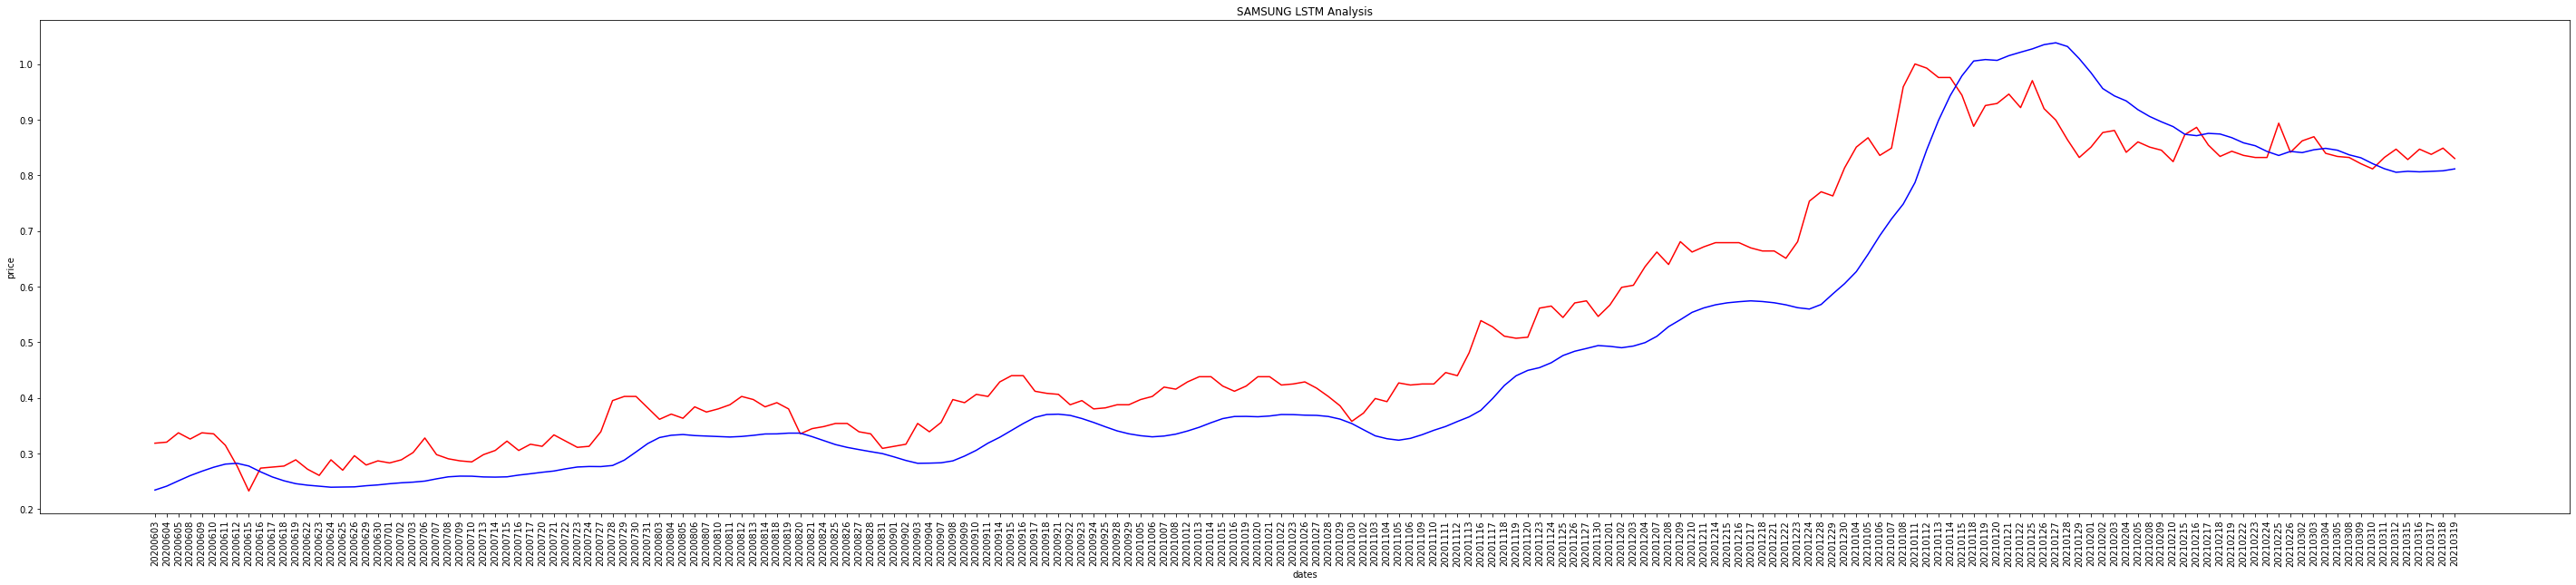

In [139]:
plt.figure(figsize = (50,10))
plt.plot(y_test, color='red', label='real SAMSUNG stock price')
plt.plot(pred_y, color='blue', label='predicted SAMSUNG stock price')
plt.xticks(range(len(new_dates)),new_dates, rotation=90)
# rotation = 90 을 하면 x tick 을 90도 기울여서 보여준다.
plt.title('SAMSUNG LSTM Analysis')
plt.xlabel('dates')
plt.ylabel('price')
plt.show()

In [38]:
window_size

20

In [46]:
# 458
window_size + len(X_train)

508

In [50]:
len(pred_y)

197

In [144]:
pred_y_tr = model.predict(X_train)

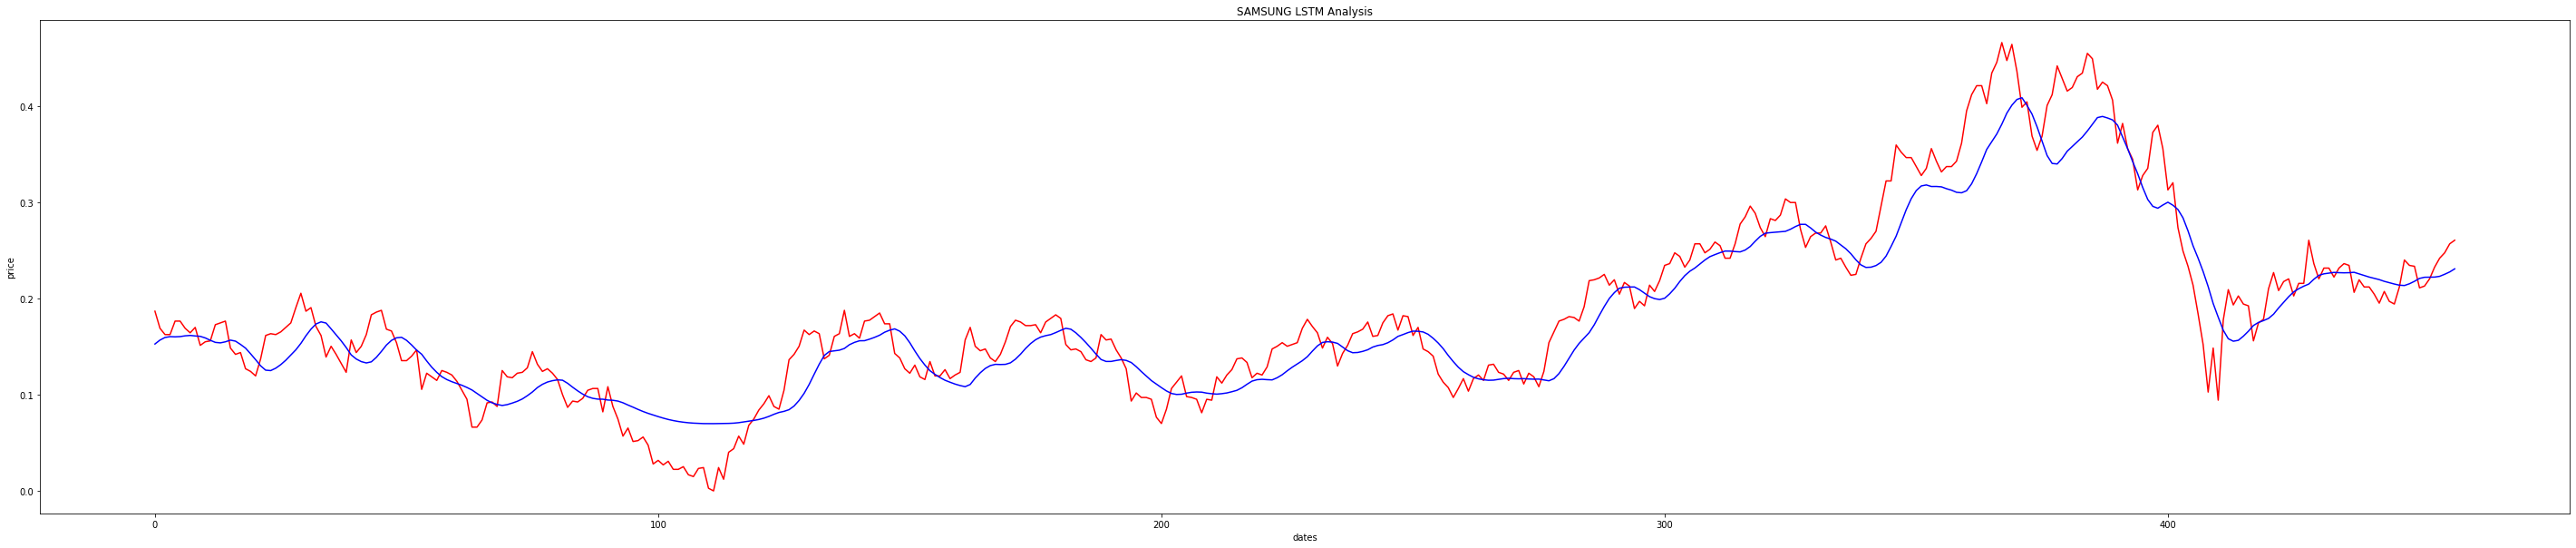

In [145]:
plt.figure(figsize = (50,10))
plt.plot(y_train, color='red', label='real SAMSUNG stock price')
plt.plot(pred_y_tr, color='blue', label='predicted SAMSUNG stock price')
# rotation = 90 을 하면 x tick 을 90도 기울여서 보여준다.
plt.title('SAMSUNG LSTM Analysis')
plt.xlabel('dates')
plt.ylabel('price')
plt.show()

In [143]:
data_x

Output hidden; open in https://colab.research.google.com to view.